<img src="https://img0.etsystatic.com/021/0/6545793/il_570xN.486810264_nq1f.jpg" style="float: top; height: 300px">

## Classification of CommuterCasual dominant areas in Melbourne

_Sharleen Othman_


Following from the previous notebook, now that I know there are two different patterns of pedestrian movement in Melbourne, namely Commuters and Casual-walkers, I shall look across all the 42 areas to see which are more commuter or casual dominant areas. PCA, like previously, should be able to help me here.

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')


In [3]:
ped = pd.read_csv('./data_imgs/main_ped.csv')
ped.head()

,Date_Time,Sensor_Name,Hourly_Counts
0,01-JUN-2009 00:00,Town Hall (West),194
1,01-JUN-2009 00:00,Collins Place (South),21
2,01-JUN-2009 00:00,Collins Place (North),9
3,01-JUN-2009 00:00,Australia on Collins,39
4,01-JUN-2009 00:00,Bourke Street Mall (South),28


In [4]:
ped.Sensor_Name.unique()

array(['Town Hall (West)', 'Collins Place (South)',
       'Collins Place (North)', 'Australia on Collins',
       'Bourke Street Mall (South)', 'Bourke Street Mall (North)',
       'Flagstaff Station', 'Melbourne Central', 'State Library',
       'Southern Cross Station', 'Victoria Point', 'New Quay',
       'Waterfront City', 'Webb Bridge', 'Princes Bridge',
       'Flinders Street Station Underpass', 'Sandridge Bridge',
       'Birrarung Marr', 'Spencer St-Collins St (North)',
       'Spencer St-Collins St (South)',
       'Melbourne Convention Exhibition Centre',
       'Bourke St-Russell St (West)', 'Chinatown-Swanston St (North)',
       'Flinders St-Elizabeth St (East)', 'QV Market-Peel St',
       'Chinatown-Lt Bourke St (South)', 'The Arts Centre',
       'QV Market-Elizabeth St (West)', 'Lygon St (West)',
       'St Kilda Rd-Alexandra Gardens', 'Lonsdale St (South)',
       'City Square', 'Flinders St-Spring St (West)',
       'Flinders St-Spark La', 'Alfred Place',
       'F

In [5]:
ped.set_index('Date_Time', inplace=True)

In [6]:
ped.index = pd.to_datetime(ped.index)
ped.head()

,Sensor_Name,Hourly_Counts
Date_Time,,
2009-06-01,Town Hall (West),194
2009-06-01,Collins Place (South),21
2009-06-01,Collins Place (North),9
2009-06-01,Australia on Collins,39
2009-06-01,Bourke Street Mall (South),28


In [20]:
pivoted = ped.pivot_table(['Date_Time', 'Hourly_Counts'],
                           index=ped.index.hour,
                           columns='Sensor_Name',
                          aggfunc=np.median,
                           fill_value=0)
pivoted.head()

Hourly_Counts                                      \
Sensor_Name  Alfred Place Australia on Collins Birrarung Marr   
0                      23                 61.0           17.0   
1                      11                 26.0            9.0   
2                       8                 15.0            7.0   
3                       5                 12.0            7.0   
4                       7                 13.0            8.0   

                                                                    \
Sensor_Name Bourke St-Russell St (West) Bourke Street Mall (North)   
0                                 240.0                       87.0   
1                                 163.0                       43.0   
2                                 112.0                       26.0   
3                                  90.5                       19.0   
4                                  61.0                       15.0   

                                                                       \
Sensor_Name Bourke Street Mall (South) Chinatown-Lt Bourke St (South)   
0                                 80.0                            100   
1                                 40.0                             52   
2                                 25.0                             29   
3                                 20.0                             21   
4                                 19.0                             15   

                                                                             \
Sensor_Name Chinatown-Swanston St (North) City Square Collins Place (North)   
0                                   137.0       157.5                  21.0   
1                                    84.0        73.0                   8.0   
2                                    46.0        41.0                   6.0   
3                                    30.0        26.0                   4.0   
4                                    20.0        22.0                   4.0   

                ...                                    \
Sensor_Name     ...     Spencer St-Collins St (North)   
0               ...                               110   
1               ...                                34   
2               ...                                22   
3               ...                                18   
4               ...                                26   

                                                                         \
Sensor_Name Spencer St-Collins St (South) St Kilda Rd-Alexandra Gardens   
0                                    43.0                          48.0   
1                                    19.0                          26.0   
2                                    13.0                          14.0   
3                                    11.0                           9.0   
4                                     9.0                          10.0   

                                                                        \
Sensor_Name State Library The Arts Centre Tin Alley-Swanston St (West)   
0                     122            80.0                         17.0   
1                      60            36.0                          8.0   
2                      36            22.0                          4.0   
3                      22            35.0                          2.0   
4                      17            46.0                          2.0   

                                                                         
Sensor_Name Town Hall (West) Victoria Point Waterfront City Webb Bridge  
0                        315           17.0            10.0         8.0  
1                        118            7.0             4.0         3.0  
2                         69            4.0             2.0         2.0  
3                         50            3.0             1.0         1.0  
4                         48            4.0             1.0         2.0  

[5 rows x 43 columns]

In [21]:
X = pivoted.values
X.shape

(24, 43)

In [22]:
X

array([[  23.,   61.,   17., ...,   17.,   10.,    8.],
       [  11.,   26.,    9., ...,    7.,    4.,    3.],
       [   8.,   15.,    7., ...,    4.,    2.,    2.],
       ..., 
       [ 108.,  238.,   92., ...,   84.,   69.,   47.],
       [  86.,  182.,   71., ...,   58.,   44.,   32.],
       [  46.,  107.,   42., ...,   29.,   21.,   18.]])

In [23]:
pca = PCA()
pca.fit(pivoted)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pc1_ev = pca.components_[0]
pd.Series(pc1_ev, index=pivoted.columns)

pc2_ev = pca.components_[1]
pd.Series(pc2_ev, index=pivoted.columns)

               Sensor_Name                           
Hourly_Counts  Alfred Place                              0.006789
               Australia on Collins                     -0.103424
               Birrarung Marr                            0.010915
               Bourke St-Russell St (West)              -0.101193
               Bourke Street Mall (North)               -0.219988
               Bourke Street Mall (South)               -0.241639
               Chinatown-Lt Bourke St (South)           -0.077439
               Chinatown-Swanston St (North)            -0.126494
               City Square                              -0.054715
               Collins Place (North)                     0.196952
               Collins Place (South)                     0.138076
               Flagstaff Station                         0.629741
               Flinders St-Elizabeth St (East)           0.042859
               Flinders St-Spark La                      0.007718
               Flinder

In [25]:
pcs = pd.DataFrame({'PC1': pc1_ev, 'PC2': pc2_ev},
             index=pivoted.columns)
pcs

PC1       PC2
              Sensor_Name                                               
Hourly_Counts Alfred Place                            0.048488  0.006789
              Australia on Collins                    0.169520 -0.103424
              Birrarung Marr                          0.040327  0.010915
              Bourke St-Russell St (West)             0.084874 -0.101193
              Bourke Street Mall (North)              0.258929 -0.219988
              Bourke Street Mall (South)              0.268093 -0.241639
              Chinatown-Lt Bourke St (South)          0.051483 -0.077439
              Chinatown-Swanston St (North)           0.094375 -0.126494
              City Square                             0.196406 -0.054715
              Collins Place (North)                   0.089060  0.196952
              Collins Place (South)                   0.107182  0.138076
              Flagstaff Station                       0.191278  0.629741
              Flinders St-Elizabeth St (East)         0.276256  0.042859
              Flinders St-Spark La                    0.025507  0.007718
              Flinders St-Spring St (West)            0.029143  0.043768
              Flinders St-Swanston St (West)          0.419458 -0.067416
              Flinders Street Station Underpass       0.193935  0.144325
              Grattan St-Swanston St (West)           0.039999 -0.013795
              Lonsdale St (South)                     0.070305 -0.079800
              Lonsdale St-Spring St (West)            0.059955  0.011037
              Lygon St (East)                         0.027558 -0.030215
              Lygon St (West)                         0.035220 -0.054390
              Melbourne Central                       0.218384 -0.210932
              Melbourne Convention Exhibition Centre  0.091657  0.015718
              Monash Rd-Swanston St (West)            0.034929 -0.002164
              New Quay                                0.028821 -0.013453
              Princes Bridge                          0.177065  0.017343
              QV Market-Elizabeth St (West)           0.098548 -0.092255
              QV Market-Peel St                       0.021010 -0.007962
              Queen St (West)                         0.065198  0.015338
              Sandridge Bridge                        0.064800  0.064633
              Southbank                               0.285113  0.109957
              Southern Cross Station                  0.111083  0.279709
              Spencer St-Collins St (North)           0.228777  0.345993
              Spencer St-Collins St (South)           0.054962  0.081192
              St Kilda Rd-Alexandra Gardens           0.079130 -0.012176
              State Library                           0.161095 -0.100822
              The Arts Centre                         0.167961  0.045007
              Tin Alley-Swanston St (West)            0.019102 -0.000086
              Town Hall (West)                        0.302296 -0.251727
              Victoria Point                          0.033209  0.039358
              Waterfront City                         0.013931 -0.011304
              Webb Bridge                             0.030976  0.027023

In [26]:
# pcs.to_csv('./pcs_for_clustering.csv')

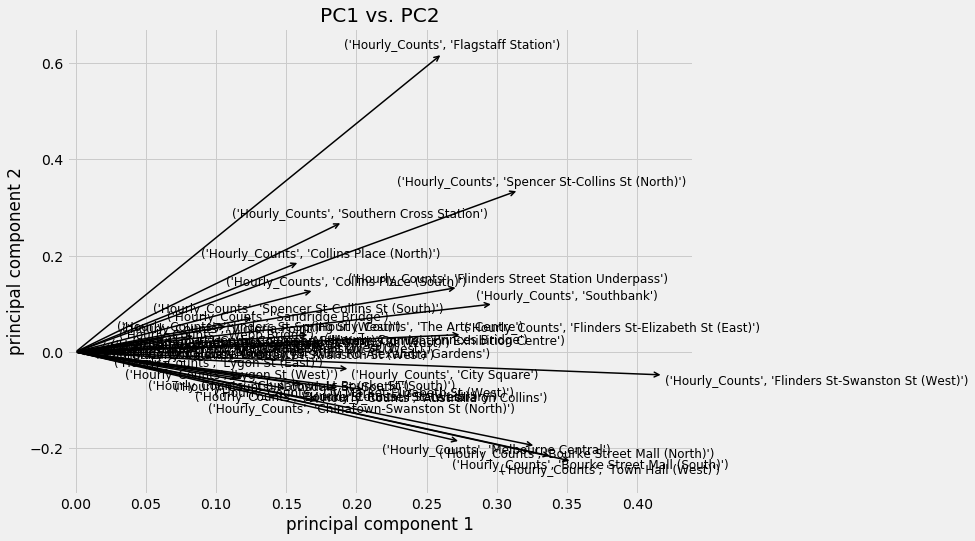

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pcs.PC1.values, pcs.PC2.values, s=0)

for i, txt in enumerate(pcs.index.values):
    ax.annotate(txt, (0, 0), (pcs.PC1.values[i], pcs.PC2.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

#Flagstaff is most different from Bourke Street Mall . 
#I already know Flinder St Swanston which goes across the centre is a mix of both casual and commuter.
# On one side of the x-axis, it is more commuter-dominant, on the other more casual-dominant.

# Flagstaff Station (Commuter-frequented)
# Bourke Street Mall (South) (Casual-frequented)
# Flinders St Swanston (A mix of both)

In [ ]:
# Using tableau to quickly plot the median pedestrian count hourly, I see exactly that Flagstaff (PC2 greater than zero) is commuter dominant.
#And on the other side (PC2 below 0) Bourke Street Mall is casual dominant.
# The clustering worked great!

<img src="./data_imgs/Area_type.png">

In [18]:
pcs['Commuter'] = pcs['PC2'].map(lambda x: 1 if x > 0.05 else 0)  #My commuter areas are 1

pcs = pcs.loc[:,['Commuter']]
pcs

#Now I have a list of Commuter-dominant areas.

Commuter
              Sensor_Name                                     
Hourly_Counts Alfred Place                                   0
              Australia on Collins                           0
              Birrarung Marr                                 0
              Bourke St-Russell St (West)                    0
              Bourke Street Mall (North)                     0
              Bourke Street Mall (South)                     0
              Chinatown-Lt Bourke St (South)                 0
              Chinatown-Swanston St (North)                  0
              City Square                                    0
              Collins Place (North)                          1
              Collins Place (South)                          1
              Flagstaff Station                              1
              Flinders St-Elizabeth St (East)                0
              Flinders St-Spark La                           0
              Flinders St-Spring St (West)                   0
              Flinders St-Swanston St (West)                 0
              Flinders Street Station Underpass              1
              Grattan St-Swanston St (West)                  0
              Lonsdale St (South)                            0
              Lonsdale St-Spring St (West)                   0
              Lygon St (East)                                0
              Lygon St (West)                                0
              Melbourne Central                              0
              Melbourne Convention Exhibition Centre         0
              Monash Rd-Swanston St (West)                   0
              New Quay                                       0
              Princes Bridge                                 0
              QV Market-Elizabeth St (West)                  0
              QV Market-Peel St                              0
              Queen St (West)                                0
              Sandridge Bridge                               1
              Southbank                                      1
              Southern Cross Station                         1
              Spencer St-Collins St (North)                  1
              Spencer St-Collins St (South)                  1
              St Kilda Rd-Alexandra Gardens                  0
              State Library                                  0
              The Arts Centre                                0
              Tin Alley-Swanston St (West)                   0
              Town Hall (West)                               0
              Victoria Point                                 0
              Waterfront City                                0
              Webb Bridge                                    0